Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem



Load Dataset Files

In [2]:
# Importing data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras import applications
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
# Setting the project path
project_path = '/content/drive/My Drive/AIML/'

In [0]:
# Traing Dataset Unzipping
from zipfile import ZipFile
with ZipFile(project_path+'Copy of train.zip', 'r') as z:
  z.extractall()

In [0]:
# Test Dataset Unzipping
from zipfile import ZipFile
with ZipFile(project_path+'Copy of test.zip', 'r') as z:
  z.extractall()

In [0]:
# Extracting the sample submission.csv file
from zipfile import ZipFile
with ZipFile(project_path+'Copy of sample_submission.csv.zip', 'r') as z:
  z.extractall()

In [0]:
# Extracting the labels.csv file
from zipfile import ZipFile
with ZipFile(project_path+'Copy of labels.csv.zip', 'r') as z:
  z.extractall()

Read the Label File : Target

In [0]:
import pandas as pd
labels_df = pd.read_csv('labels.csv')

Checking the files which are internally extracted

In [10]:
import os 
os.listdir()

['.config',
 'test',
 'train',
 'drive',
 'sample_submission.csv',
 'labels.csv',
 'sample_data']

In [11]:
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Checking the unique dogs breeds

In [12]:
breed_count = labels_df['breed'].value_counts()
breed_count

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

From above we can conclude that we have totally 120 breeds of dogs available in the .csv file

In [13]:
print('Number of dog Category: ', len(labels_df.breed.unique()))

Number of dog Category:  120


In [14]:
labels_df.shape

(10222, 2)

In [15]:
len(labels_df) #Totally we have 10222 dogs

10222

In [0]:
#Get lable encoding for labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels_df.breed)
labels_df['breedEncoded'] = le.transform(labels_df.breed)

In [17]:
labels_df.head(5)

,id,breed,breedEncoded
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,19
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,37
2,001cdf01b096e06d78e9e5112d419397,pekinese,85
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,15
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,49


In [18]:
len(labels_df['breedEncoded'].unique()) # we have all the breeds encoded into corresponding nos. from 1 to 120

120

In [0]:
import tensorflow as tf
labels = tf.keras.utils.to_categorical(labels_df.breedEncoded) #Converting all the 120 breeds in 0s and 1 format

In [20]:
labels[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

Preparing training dataset

Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder.



Create 2 variables



a. x_train - Should have all the images of the dogs from train folder


b. y_train - Corresponding label of the dog
The id of the dog images and its corresponding labels are available in labels.csv file
Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
import cv2
X_train = []

ImgCnt = labels_df.shape[0] #fixing the range 10222 - upto how much range the for loop should run

for i in range(ImgCnt):
  try:
      dummy = cv2.imread('/content/train/' + labels_df.id[i] + '.jpg')  #'content/train' internally stored place where the train file is extracted and processed
                                                                        #here we are adding the id, from the lables.csv file and making it as .jpg image and storing into a variable
                                                                        #By including the id cols we can link it to the breeds in the lables.csv classification
      dummy = cv2.resize(dummy,(128,128)) #resize to have all the images of same size of 128,128
      X_train.append(dummy)
  except Exception as e:
      print(e)

In [0]:
import cv2
M_train = []

ImgCnt = labels_df.shape[0] #fixing the range 10222 - upto how much range the for loop should run

for i in range(ImgCnt):
  try:
      dummy = cv2.imread('train/' + labels_df.id[i] + '.jpg')  #'content/train' internally stored place where the train file is extracted and processed
                                                                        #here we are adding the id, from the lables.csv file and making it as .jpg image and storing into a variable
      dummy = cv2.resize(dummy,(128,128)) #resize to have all the images of same size of 128,128
      M_train.append(dummy)
  except Exception as e:
      print(e)

In [23]:
len(M_train)

10222

In [24]:
X_train[2]

array([[[ 98, 104, 105],
        [106, 111, 112],
        [105, 110, 111],
        ...,
        [ 44,  46,  57],
        [  4,   4,  14],
        [ 19,  20,  18]],

       [[ 85,  90,  90],
        [ 97, 101, 102],
        [101, 105, 106],
        ...,
        [ 45,  47,  57],
        [ 54,  55,  65],
        [ 13,  13,  13]],

       [[ 86,  90,  92],
        [ 78,  82,  83],
        [ 91,  95,  96],
        ...,
        [ 49,  52,  60],
        [ 47,  49,  57],
        [  8,   7,   9]],

       ...,

       [[190, 193, 193],
        [186, 188, 189],
        [199, 202, 203],
        ...,
        [117, 119, 120],
        [133, 136, 137],
        [131, 126, 135]],

       [[188, 192, 193],
        [187, 191, 192],
        [186, 190, 191],
        ...,
        [103, 108, 108],
        [ 99, 103, 104],
        [109, 107, 109]],

       [[195, 199, 200],
        [196, 200, 201],
        [190, 194, 195],
        ...,
        [125, 129, 130],
        [ 95,  98,  99],
        [105, 109, 110]]

In [25]:
X_train[0].shape #Images are already with 3 dimension, RGB

(128, 128, 3)

In [26]:
print('x_train Count: ', len(X_train)) #10222 IMAGES ARE PICKED AND LABLES ARE ADDED FROM LABLES.CSV FILE

x_train Count:  10222


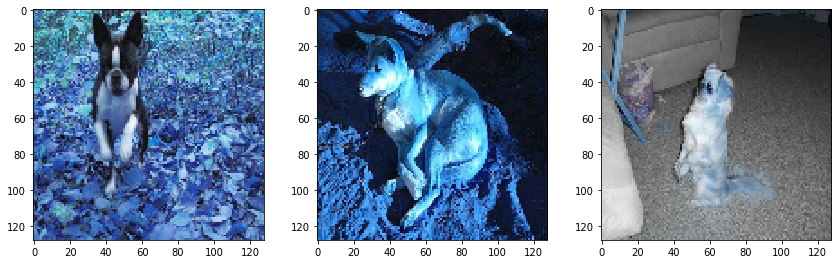

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(50,50))

for i in range(3):
  plt.subplot(10,10,i+1)
  plt.imshow(X_train[i], cmap=plt.cm.binary)


Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
#Convert the list to numpy array for easy manipulation...
X_train_arr = np.asarray(X_train)

In [30]:
X_train_arr.shape

(10222, 128, 128, 3)

In [0]:
#Normalize training set
x_train = X_train_arr/255;

In [32]:
x_train.shape

(10222, 128, 128, 3)

In [0]:
X_train_std = x_train.reshape(x_train.shape[0], 128, 128, 3).astype('float32')

In [70]:
X_train_std.shape

(10222, 128, 128, 3)

Split the training and validation data from x_train_data and y_train_data obtained from above step

In [35]:
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_std, labels, test_size=0.2, random_state=2)
print ("No. of images in train dataset: ", len(X_train_split))
print ("No. of images in Validation dataset: ", len(X_val_split))

No. of images in train dataset:  8177
No. of images in Validation dataset:  2045


Loading the test data


Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img = pd.read_csv('/content/sample_submission.csv')['id']

In [62]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

In [0]:
test_img_1 = pd.read_csv('sample_submission.csv')['id']

In [65]:
len(test_img_1)

10357

In [70]:
x_test_feature_1 = []
ImgCnt = len(test_img)

for i in range(ImgCnt):
  try:
      dummy = cv2.imread('/content/test' + test_img[i] + '.jpg')
      dummy = cv2.resize(dummy,(128,128)) #resize to have all the images of same size
      x_test_feature_1.append(dummy)
  except Exception as e:
      print(e)

Streaming output truncated to the last 5000 lines.

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgpr

In [71]:
len(x_test_feature_1)

0

Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.


Add a Dense layer with 256 neurons with relu activation

Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with softmax activation for classifiaction.

In [36]:

model = Sequential()
model.add(Convolution2D(filters=32, input_shape = (128,128,3), kernel_size=5)) 
model.add(Convolution2D(filters=64, kernel_size=3))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(256, activation = 'relu'))
model.add(Dense(120, activation = 'softmax'))

Use batch_size = 128 and epochs = 10 and execute the model

In [37]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [38]:
history = model.fit(X_train_split, y_train_split,
                    epochs=10, 
                    validation_data=(X_val_split, y_val_split),
                    verbose = 1,
                    batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8177 samples, validate on 2045 samples
Epoch 1/10





8177/8177 [==============================] - 487s 60ms/step - loss: 15.8348 - acc: 0.0066 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 2/10
8177/8177 [==============================] - 478s 58ms/step - loss: 16.0057 - acc: 0.0070 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 3/10
8177/8177 [==============================] - 475s 58ms/step - loss: 16.0057 - acc: 0.0070 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 4/10
8177/8177 [==============================] - 473s 58ms/step - loss: 16.0057 - acc: 0.0070 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 5/10
8177/8177 [==============================] - 474s 58ms/step - loss: 16.0057 - acc: 0.0070 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 6/10
8177/8177 [==============================] - 475s 58ms/step - loss: 16.0057 - acc: 0.0070 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 7/10
8177/

KeyboardInterrupt: ignored

The accuracy is very poor...!!

Augmenting the data

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=50,  
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    horizontal_flip=False,  
    vertical_flip=False)

In [0]:
train_datagen.fit(X_train_split) #fitting the data augmentation parameters to the train data set

In [0]:
val_datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=50,  
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    horizontal_flip=False,  
    vertical_flip=False)

In [0]:
val_datagen.fit(X_val_split)  #Fitting the data augmentation parameters to the test data set

Using the above objects, create the image generators with variable names train_generator and val_generator 


You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(X_train_split, y_train_split, batch_size=9) #Flowing the augmentation parameters to the entier x_train and y_train
val_generator = val_datagen.flow(X_val_split, y_val_split, batch_size=9)


Fit the model using fit_generator() using train_generator and val_generator from the above step with 10 epochs

In [44]:
model.fit_generator(train_generator,\
                    epochs=10, steps_per_epoch=300, \
                    verbose=1,validation_data=val_generator, validation_steps = 300) #https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/

Epoch 1/10
300/300 [==============================] - 690s 2s/step - loss: 15.9987 - acc: 0.0074 - val_loss: 15.9924 - val_acc: 0.0078
Epoch 2/10
300/300 [==============================] - 689s 2s/step - loss: 15.9927 - acc: 0.0078 - val_loss: 15.9864 - val_acc: 0.0082
Epoch 3/10
300/300 [==============================] - 687s 2s/step - loss: 16.0226 - acc: 0.0059 - val_loss: 15.9984 - val_acc: 0.0074
Epoch 4/10
206/300 [===================>..........] - ETA: 3:17 - loss: 16.0225 - acc: 0.0059

KeyboardInterrupt: ignored

The accuracy is still poor  though after data augmenting

Lets use Transfer Learning
Download the vgg wieght file from here :

 https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model_1= VGG16(weights='imagenet',
                 include_top=False, pooling='avg', input_shape = (128, 128, 3))

In [61]:
base_model_1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [65]:
model_1 = keras.applications.VGG16(weights = "/content/drive/My Drive/AIML/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5", 
                                   include_top=False, input_shape = (128, 128, 3))

ValueError: ignored

In [66]:
newmodel = Dense(1024, activation='relu', name='ds1',use_bias=False, kernel_initializer='uniform')(output_vgg16)
newmodel = BatchNormalization()(newmodel)
newmodel = Dense(256, activation='relu', name='ds2')(newmodel)
newmodel=  Dropout(0.3)(newmodel)
newmodel = Dense(120, activation='softmax', name='predictions',kernel_initializer='uniform')(newmodel)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [67]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in base_model_1.layers:
  #if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in base_model_1.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

input_2
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_pool
False
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_pool
False
global_average_pooling2d_2
False


In [69]:
mymodel = Model(input=input, output=newmodel)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  """Entry point for launching an IPython kernel.


In [0]:

mymodel.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [73]:
mymodel.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 128, 128, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
ds1 (Dense)                  (None, 1024)              524288    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
ds2 (Dense)                  (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
predictions (Dense)          (None, 120)               3084

In [74]:
history = mymodel.fit(X_train_split, y_train_split,
                    epochs=10, 
                    validation_data=(X_val_split, y_val_split),
                    batch_size=20,
                    verbose = 1,
                    initial_epoch=0)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 863s 106ms/step - loss: 4.1123 - acc: 0.0939 - val_loss: 3.6545 - val_acc: 0.1403
Epoch 2/10
8177/8177 [==============================] - 860s 105ms/step - loss: 3.3015 - acc: 0.2017 - val_loss: 3.6272 - val_acc: 0.1472
Epoch 3/10
8177/8177 [==============================] - 863s 105ms/step - loss: 3.0275 - acc: 0.2491 - val_loss: 3.4415 - val_acc: 0.1936
Epoch 4/10
8177/8177 [==============================] - 861s 105ms/step - loss: 2.8096 - acc: 0.2896 - val_loss: 3.5575 - val_acc: 0.1658
Epoch 5/10
8177/8177 [==============================] - 860s 105ms/step - loss: 2.6440 - acc: 0.3252 - val_loss: 3.4031 - val_acc: 0.2176
Epoch 6/10
8177/8177 [==============================] - 862s 105ms/step - loss: 2.4860 - acc: 0.3624 - val_loss: 3.4559 - val_acc: 0.2093
Epoch 7/10
8177/8177 [==============================] - 861s 105ms/step - loss: 2.3531 - acc: 0.3893 - val_loss: 3.4685 - va

The accuracy keep increasing on increasing the epoch size.